In [1]:
from glob import glob
import sys
import matplotlib.pylab as plt
import nibabel as nib
import numpy as np
import os
import json
from nilearn.image import resample_img
# np.set_printoptions(threshold=sys.maxsize)

# Preprocess
### Case visualisation determines that each case or each 3D-images has different number layers


### Image padding
- When padding is required, -1024 will be assigned for the padding of the voxel space. This is because the minimum value for the voxel space is -1024.

### Image clipping
- Voxel space that is no within target shape is clipped.

-- https://nilearn.github.io/dev/modules/generated/nilearn.image.resample_img.html#nilearn.image.resample_img

# Different Voxel Spacing
- This can also be described that dataset has different affine setting.
### Affine Matrix
- Below give general information about affine matrix
- ![alt AFFINE MATRIX](./notebook_imgs/affine_img.png "Title")


In [2]:
train_images = sorted(glob("./dataset/case_00???/imaging.nii.gz"))
segmentation_images = sorted(glob("./dataset/case_00???/segmentation.nii.gz"))

## Inspect affine matrix
- eg: comparing case 0 vs case 2, voxel spacing of case 0 is smaller.
- to save space, higher voxel spacing is to be used. Kit19 from https://github.com/jchen42703/kits19-cnn/tree/master has used target_spacing=(3.22, 1.62, 1.62),
- following use target_spacing=(2, 2, 2)

In [3]:
target_affine_space = np.array(([0, 0, -2, 0],[0, -2, 0, 0],[-2, 0, 0, 0],[0, 0, 0, 1]))
target_shape = (128, 232, 232)

In [4]:
img_case0_loader = nib.load(train_images[0])
img_case2_loader = nib.load(train_images[2])

In [5]:
print("case 0 with shape {} has affine: \n{}".format(img_case0_loader.shape, img_case0_loader.affine))

case 0 with shape (611, 512, 512) has affine: 
[[ 0.          0.         -0.91992188  0.        ]
 [ 0.         -0.91992188  0.          0.        ]
 [-0.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [6]:
print("case 2 with shape {} has affine: \n{}".format(img_case2_loader.shape, img_case2_loader.affine))

case 2 with shape (261, 512, 512) has affine: 
[[ 0.          0.         -0.93945312  0.        ]
 [ 0.         -0.93945312  0.          0.        ]
 [-1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [7]:
resampled_case0_loader = resample_img(img_case0_loader, target_affine=target_affine_space, target_shape=target_shape, interpolation='nearest')
resampled_case2_loader = resample_img(img_case2_loader, target_affine=target_affine_space, target_shape=target_shape, interpolation='nearest')

In [8]:
print("case 0 with shape {} has affine: \n{}".format(resampled_case0_loader.shape, resampled_case0_loader.affine))

case 0 with shape (128, 232, 232) has affine: 
[[ 0.  0. -2.  0.]
 [ 0. -2.  0.  0.]
 [-2.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


In [9]:
print("case 2 with shape {} has affine: \n{}".format(resampled_case2_loader.shape, resampled_case2_loader.affine))

case 2 with shape (128, 232, 232) has affine: 
[[ 0.  0. -2.  0.]
 [ 0. -2.  0.  0.]
 [-2.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


In [10]:
img_case0 = img_case0_loader.get_fdata()
img_case0_resampled = resampled_case0_loader.get_fdata()
img_case2 = img_case2_loader.get_fdata()
img_case2_resampled = resampled_case2_loader.get_fdata()

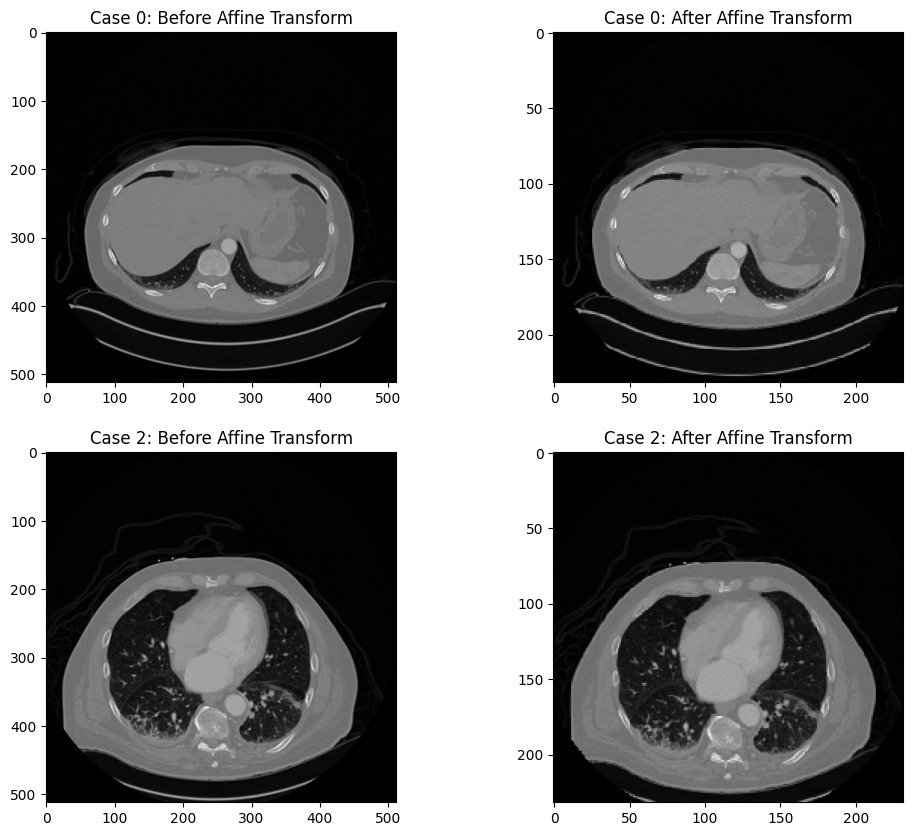

In [11]:
this_layer = 0
plt.style.use('default')
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes[0,0].imshow(img_case0[this_layer,:,:], cmap="gray")
axes[0,0].title.set_text(f'Case 0: Before Affine Transform')
axes[0,1].imshow(img_case0_resampled[this_layer,:,:], cmap="gray")
axes[0,1].title.set_text(f'Case 0: After Affine Transform')
axes[1,0].imshow(img_case2[this_layer,:,:], cmap="gray")
axes[1,0].title.set_text(f'Case 2: Before Affine Transform')
axes[1,1].imshow(img_case2_resampled[this_layer,:,:], cmap="gray")
axes[1,1].title.set_text(f'Case 2: After Affine Transform')
# axe.set_title(f"Case={case_index}, Labels={np.unique(seg_img[190,:,:])}, Layer={this_layer}")
plt.show()

# Preprocess to transform all dataset to target affine space
- This enable consistent voxel space for analysis
- In general, voxel space is downsampled, this will save process time.